## Ejemplo red neuronal profunda clasificadora 

 Esta es una red neuronal profunda básica, que se entrena con un dataset (en este caso, de imágenes de 28x28 pixeles) para realizar predicciones sobre elementos similares. Este modelo evalúa elementos según alguna característica entregada por el dataset. En este ejemplo usamos fashion_mnist. La característica entregada es la prenda de ropa que corresponde a la imagen, asociado a un valor numérico (Ej: Pantalones -> 1).

### Primero crearemos nuestro modelo  

In [2]:
import tensorflow as tf  # Importamos tensorflow
import datetime
import matplotlib.pyplot as plt
import numpy as np
tf.compat.v1.enable_resource_variables()
mnist = tf.keras.datasets.fashion_mnist
# Acá puedes poner cualquier dataset de imágenes que quieras clasificar, ejemplos son mnist y fashion_mnist

In [3]:
# definimos el dataset que usaremos y normalizamos las imágenes.
(image_train, label_train), (image_test, label_test) = mnist.load_data()
# label es la característica o tipo de esa imagen 
image_train = tf.keras.utils.normalize(image_train, axis=1) 
image_test = tf.keras.utils.normalize(image_test, axis=1)

In [4]:
#Elegimos un modelo secuencial, que nos deja crear una estructura de red por capas
model = tf.keras.models.Sequential() 
#Convertimos las imágenes de matrices 28x28 a vectores de 784 elementos
model.add(tf.keras.layers.Flatten())   
# Agregamos nuestras capas, dos capas ocultas y una de salida. La capa de entrada la definimos con input_shape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= image_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [5]:
#Usaremos Adam: Adaptive moment estimation como nuestro optimizador. Sirve como default en muchas redes
model.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', #El loss es la función que la red busca minimizar 
              metrics=['accuracy'])

In [6]:
# Entrenamos el modelo
callback_val_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
callback_val_accuracy = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
history = model.fit(image_train, label_train,
                    epochs=5,
                    validation_data=(image_test, label_test), 
                    callbacks = [callback_val_accuracy, callback_val_loss])  

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4837 - accuracy: 0.8228 - val_loss: 0.4094 - val_accuracy: 0.8547
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3570 - accuracy: 0.8684 - val_loss: 0.3777 - val_accuracy: 0.8609
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3196 - accuracy: 0.8814 - val_loss: 0.3532 - val_accuracy: 0.8667
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2949 - accuracy: 0.8888 - val_loss: 0.3534 - val_accuracy: 0.8718
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2770 - accuracy: 0.8955 - val_loss: 0.3395 - val_accuracy: 0.8776


  Nuestro modelo es una DNN (dense neural network), esto significa que todas las neuronas de una capa están conectadas con todas las neuronas de la capa siguiente. Esto le permite a nuestro modelo encontrar patrones con toda la información disponible, y descartar conexiones innecesarias cambiando los pesos a casi 0. Trainable params se refiere a los pesos que aplica cada neurona a su entrada para obtener la salida, que son lo que varia en el modelo al entrenar. En este modelo, la cantidad de trainable params es igual a Total params, pues todos los parametros varían con el entrenamiento.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


Acá evaluamos la eficacia de nuestro modelo según los parámetros de exactitud (accuracy) y perdida (loss)

313/313 - 1s - loss: 0.3395 - accuracy: 0.8776


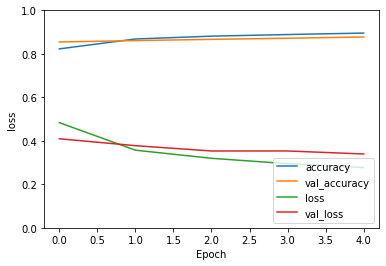

In [8]:
# Evaluamos nuestro modelo
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(image_test,  label_test, verbose=2)

 Accuracy y loss representan la exactitud y perdida de la red con las imágenes de entrenamiento, mientras que val_accuracy y val_loss representan estos valores para imágenes nuevas. Si existe una diferencia muy notoria entre estos valores de entrenamiento y testeo, suele significar que se produjo overfitting, es decir que la red memorizó los elementos de entrenamiento. Esto puede ser provocado por entrenamiento excesivo o por entrenar con una muestra muy pequeña.

In [9]:
model.save('red_clasificadora.model') #para guardar el modelo
# La siguiente advertencia se debe a una un 
# cambio en como funciona TensorFlow de la versión 1.0 a 2.0, no afecta el funcionamiento del modelo.

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: red_clasificadora.model/assets


In [10]:
model = tf.keras.models.load_model('red_clasificadora.model') #Para volver a cargarlo


Ahora crearemos predicciones para las imágenes de testeo. Veremos como la red clasifica estas imágenes.

In [11]:
predictions = model.predict(image_test) #Creamos predicciones para un batch de testeo

In [12]:
# Las predicciones son vectores de numeros entre 0 y 1, que representan la certeza de la red respecto a 
#la clasificación de la imagen. La clasificación asociada a una imagen es el valor de máxima certeza.
print(predictions) 

[[3.67513130e-05 8.42529246e-08 5.59847604e-06 ... 2.78124139e-02
  9.61507885e-06 9.70551789e-01]
 [6.44284184e-04 1.03541886e-07 9.88178670e-01 ... 2.93254658e-07
  1.18280586e-05 1.53390417e-07]
 [3.41168779e-04 9.99613464e-01 1.47823323e-06 ... 2.79546808e-09
  3.71012135e-07 3.43742235e-09]
 ...
 [2.13138337e-05 1.21916059e-08 3.76771641e-06 ... 2.22877432e-07
  9.99956965e-01 8.36356477e-08]
 [6.62607090e-06 9.99920845e-01 6.71973453e-07 ... 1.09756346e-08
  1.11172888e-07 4.38947723e-09]
 [5.14034397e-08 1.31821221e-08 3.06346379e-07 ... 9.88460379e-04
  4.50137304e-05 5.95627716e-06]]


In [13]:
n = 9
print(np.argmax(predictions[n]))
#Imprimimos la clasificacion de maxima certeza para el elemento n

7


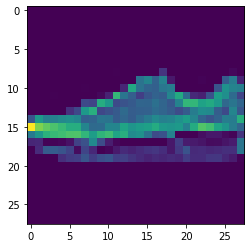

In [14]:
# Esta es la imagen asociada al elemento n
plt.imshow(image_test[9])
plt.show()

Acá se puede ver cual es la clasificación de las imágenes, para verificar si la predicción de la red fue correcta. En el ejemplo utilizamos el elemento numero 9, que tiene un valor de 7. Podemos ver en esta tabla que 7 representa a las zapatillas. 

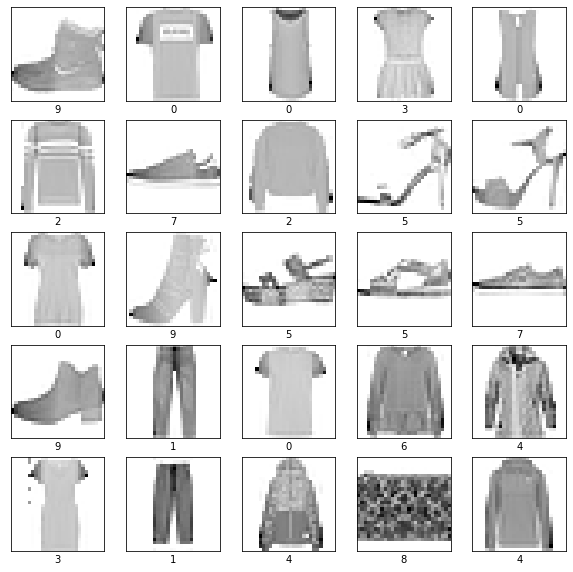

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_train[i])
plt.show()